# Image Processing Pratice

In [1]:
import cv2
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)


In [3]:
def plot_image(img, title="", cmap=None, size=(9,6)):
    plt.figure(figsize=size)
    plt.imshow(img, cmap),plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
img = cv2.imread('kitten.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Caculating histogram

Caculating histogram of each channel

In [5]:
hist_blue = cv2.calcHist([img],[0],None,[256],[0,256])
hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
hist_red = cv2.calcHist([img],[2],None,[256],[0,256])

Plot histogram

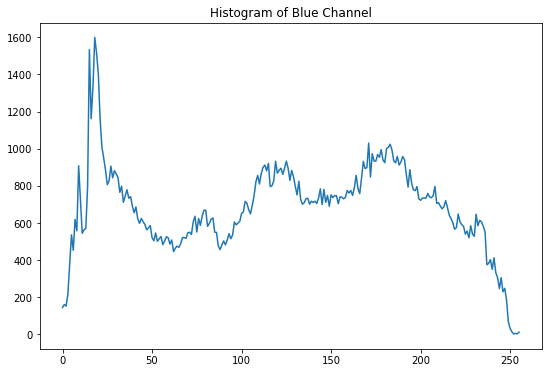

In [6]:
plt.title("Histogram of Blue Channel")
plt.plot(hist_blue)
plt.show()

In [ ]:
plt.title("Histogram of Green Channel")
plt.plot(hist_green)
plt.show()

In [ ]:
plt.title("Histogram of Red Channel")
plt.plot(hist_red)
plt.show()

In [ ]:
plt.title("Histogram of Three Channel")
plt.plot(hist_blue), plt.plot(hist_green), plt.plot(hist_red)
plt.show()

## Filter in spatial domain

In [7]:
img = cv2.imread('kitten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Average Filter

#### Mask 1

In [8]:
mask1 = np.ones((5,5),np.float32)/25

In [9]:
result = cv2.filter2D(img,-1,mask1)

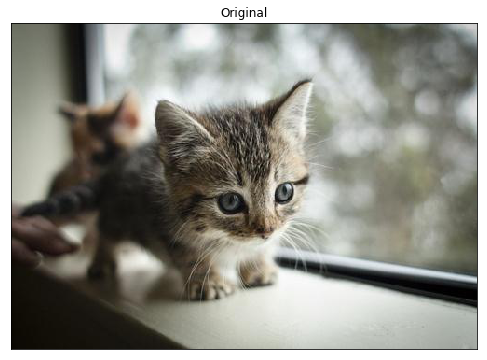

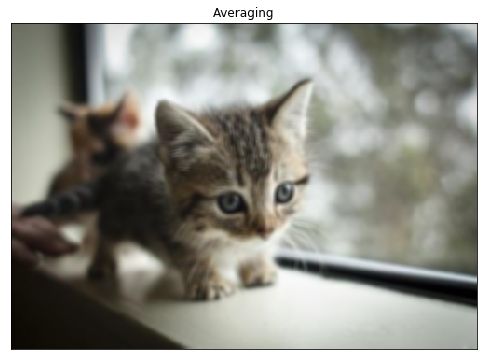

In [10]:
plot_image(img, "Original")
plot_image(result, "Averaging")

#### Mask 2

In [ ]:
mask2 = 1.0/10* np.array([[1, 1, 1],
                       [1, 2, 1],
                       [1, 1, 1]])

In [ ]:
result = cv2.filter2D(img,-1,mask2)

In [ ]:
plt.figure(figsize=(24,16))
plt.subplot(211),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(result),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
mask2

### Median Filter

In [ ]:
img = cv2.imread('penguin.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
median = cv2.medianBlur(img, 3)

In [ ]:
plot_image(img, "Original")

In [ ]:
plot_image(median, "Median")

### Laplace

In [11]:
img = cv2.imread("kitten.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
c = 0.0
mask3 = np.array([[0, -1,0],
                 [-1, 4+c, -1],
                 [0, -1,0]])

In [13]:
mask3

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]])

In [14]:
result = cv2.filter2D(img,-1,mask3)

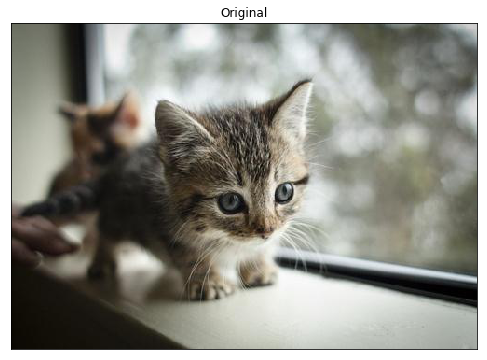

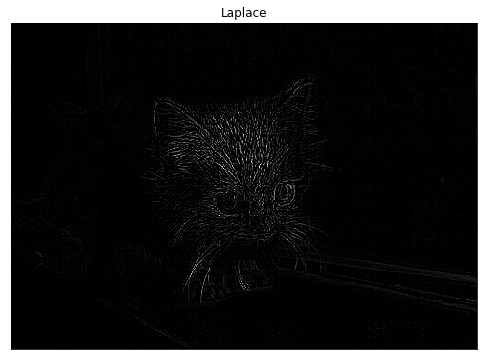

In [15]:
plot_image(img, "Original")
plot_image(result, "Laplace")

## Frequencies Domain

In [ ]:
img = cv2.imread('kitten.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


In [ ]:
plot_image(img, cmap='gray')

In [ ]:
plot_image(magnitude_spectrum, title='Magnitude Spectrum', cmap='gray', size=(12,8))